<a href="https://colab.research.google.com/github/sidvin101/explainable-llm/blob/main/explainable_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #08
### This is Assignment 8 of my Explainable AI Course at Duke University
### Siddarth Vinnakota



* NOTE: Some AI was used to format the text input sentences into a list

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [1]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "explainable-llm" # Change to your repo name
git_path = 'https://github.com/sidvin101/explainable-llm.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt


Cloning into 'explainable-llm'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [1]:
pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 2.3 MB/s eta 0:00:00


In [4]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00


In [20]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [4]:
#importing values
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

In [5]:
#Load  the model. In this case, we will be using stella_en_400M_v5
model = SentenceTransformer(
     "dunzhang/stella_en_400M_v5",
     trust_remote_code=True,
     device="cpu",
     config_kwargs={"use_memory_efficient_attention": False, "unpad_inputs": False}
     )

model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at dunzhang/stella_en_400M_v5 were not used when initializing NewModel: ['new.pooler.dense.bias', 'new.pooler.dense.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that 

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: NewModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Dense({'in_features': 1024, 'out_features': 1024, 'bias': True, 'activation_function': 'torch.nn.modules.linear.Identity'})
)

In [7]:
#Here is some example text. This will be a combination of lyrics. One from a love song (Shivers by Ed Sheeran), and another from a heavy metal song (Through the Fire and the Flames by Dragonforce)
#This should theoretically provide an easy to see overview of text similarity.
#NOTE: AI was used here to create the list
lyrics = [
    "I took an arrow to the heart",
    "I never kissed a mouth that taste like yours",
    "Strawberries and something more",
    "Ooh, yeah, I want it all",
    "Lipstick on my guitar (ooh)",
    "Fill up the engine, we can drive real far",
    "Go dancing underneath the stars",
    "Hmm, you got me feeling like",
    "I wanna be that guy",
    "I wanna kiss your eyes",
    "On a cold winter morning, in the time before the light",
    "In flames of death's eternal reign, we ride towards the fight",
    "When the darkness has fallen down, and the times are tough all right",
    "The sound of evil laughter falls around the world tonight",
    "Fighting hard, fighting on for the steel, through the wastelands evermore",
    "The scattered souls will feel the hell, bodies wasted on the shores",
    "On the blackest plains in hell's domain, we watch them as they go",
    "In fire and pain, now once again, we know",
    "So now we fly ever free",
    "We're free before the thunderstorm"
]

#We then encode the text through our model
embeddings = model.encode(lyrics)

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1126: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


# T-NSE

T-NSE, or T-Distributed Stochastic Neighbor Embedding is a technique for reducing demensions. It relies on probability. It takes the original data entered in the algorithm and matches them to two distributions, one for pairwise similarities of the inputs, and another for the pairwise similarities of the matching low-dim points in the embedding.

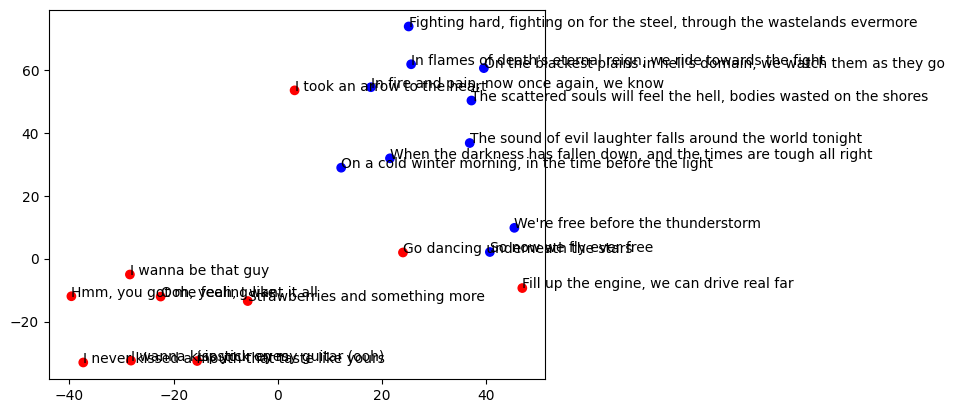

In [8]:
#T-NSE Transform and Visualization
tsne = TSNE(n_components=2, random_state=0, perplexity = 5)
embeddings_tsne = tsne.fit_transform(embeddings)

#Colors to indicate which song is it
colors = ['red' if i < len(lyrics)/2 else 'blue' for i in range(len(lyrics))]

plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=colors)
for i, text in enumerate(lyrics):
    plt.annotate(text, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))
plt.show()

As shown, both song lyrics are conglomerated into their respective cultures. However, as shown, one of Ed Sheeran's lyrics is bunched in with the others, which makes sense, as "I took an arrow to the heart" doesn't sound like a love lyric in the literal sense.

# PCA

PCA or Principle Component Analysis is another dimension reduction method. Unlike T-SNE, it relies on mathematics, rather than probability distribution. It looks at the correlation between some dimensions. With them, it tries to provide a minimum number of variables that keeps the most variation in information. This is all done through Matrix principles, such as eigenvalues and eigenvalues.

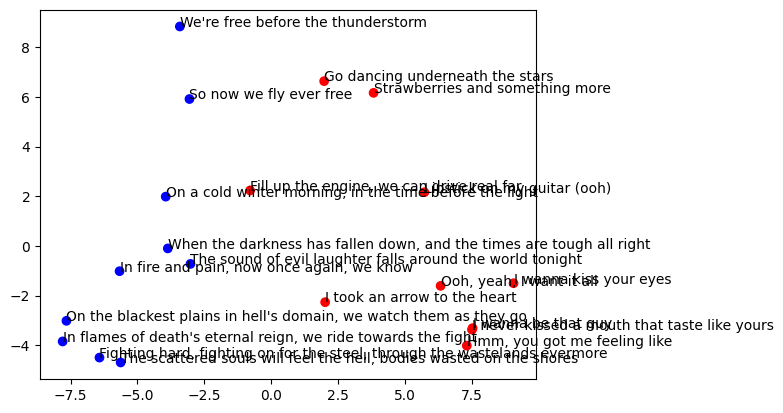

In [9]:
#PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

#Colors to indicate which song is it
colors = ['red' if i < len(lyrics)/2 else 'blue' for i in range(len(lyrics))]

plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=colors)
for i, text in enumerate(lyrics):
    plt.annotate(text, (embeddings_pca[i, 0], embeddings_pca[i, 1]))
plt.show()

Unlike T-NSE, there are no clear clusters. However, through one component, there does appear to be a divide between the two songs. The top four lyrics also seem to be a bit separate from the other lyrics, indicating a distinct pattern in the y-component.

#UMAP

UMAP works similar to t-SNE by creating a high dimensional graph, then optimizing it with a low-dimensional graph.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


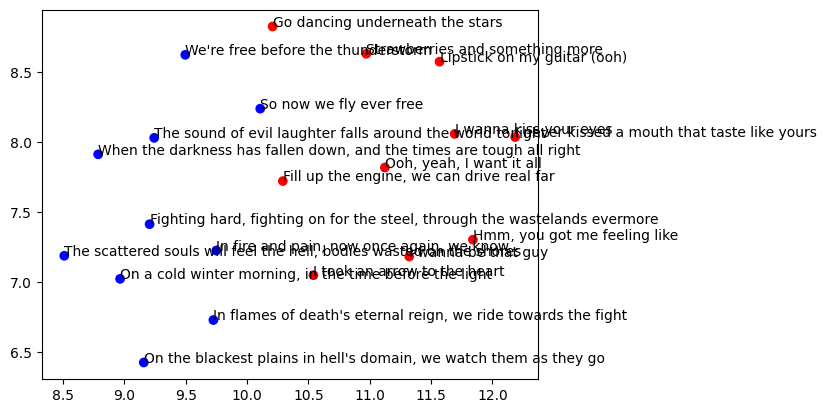

In [10]:
#UMAP
my_umap = umap.UMAP(n_components=2, random_state=0)
embeddings_umap = my_umap.fit_transform(embeddings)

#Colors to indicate which song is it
colors = ['red' if i < len(lyrics)/2 else 'blue' for i in range(len(lyrics))]

plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=colors)
for i, text in enumerate(lyrics):
    plt.annotate(text, (embeddings_umap[i, 0], embeddings_umap[i, 1]))
plt.show()

Like PCA, UMAP can split the two songs pretty evenly via one component. However, with the component, we can see that there are hidden patterns that pair both songs up.

#Conclusion

Ultimately, based on this study it appears that T-SNE is the best model for looking at the classification, but the others are interesting to look at some hidden similarities. Maybe both bands should collab!